### Gradient Descent with and without $\ell_{2}$ Regularization for Logistic Regression From Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
# load the data
def load_data(csvname):
    data = np.asarray(pd.read_csv(csvname, header = None))
    x = data[:,0]
    x.shape = (np.size(x),1)
    temp = np.ones((np.size(x),1))
    X = np.concatenate((temp,x),1)
    y = data[:,1]
    y = y/y.max()
    y.shape = (np.size(y),1)
    return X,y

In [3]:
# avoid overflow when using exp - just cutoff after arguments get too large/small
def my_exp(u):
    s = np.argwhere(u > 100)
    t = np.argwhere(u < -100)
    u[s] = 0
    u[t] = 0
    u = np.exp(u)
    u[t] = 1
    return u

In [4]:
# calculate the cost value for a given input weight w
def compute_cost(w):
    temp = 1/(1 + my_exp(-np.dot(X,w))) - y
    temp = np.dot(temp.T,temp)
    return temp[0][0]

In [5]:
# run gradient descent
def gradient_descent(X, y , w0, L2_lam=False):
    w_path = []    # container for weights learned at each iteration
    cost_path = [] # container for associated objective values at each iteration
    w_path.append(w0)
    cost = compute_cost(w0)
    cost_path.append(cost)
    w = w0

    # start gradient descent loop
    max_its = 5000
    alpha = 1e-2
    for k in range(max_its):
        # compute gradient
        
        sigma = 1 / (1 + my_exp(-(X@w)))
        grad = 2*np.sum((sigma-y)*sigma*(1-sigma)*X, axis=0)
        grad.shape = (2,1)
        
        #  Considering L2 Regularization
        if L2_lam!=False:
            reg_w = np.array([0,w[1][0]])
            reg_w.shape = (2,1)
            grad += 2*L2_lam*reg_w

        # take gradient step
        w = w - alpha*grad

        # update path containers
        w_path.append(w)
        cost = compute_cost(w)
        cost_path.append(cost)

    # reshape containers for use in plotting in 3d
    w_path = np.asarray(w_path)
    w_path.shape = (np.shape(w_path)[0],np.shape(w_path)[1])
    return w_path, cost_path

Now that everything is defined we can run them all

In [14]:
# load dataset
X, y = load_data('bacteria_data.csv') # load in data

# run gradient descent with initial point
w0 = np.array([0,-2])
w0.shape = (2,1)

w_path, cost_path = gradient_descent(X,y,w0)

w_path_L2, cost_path_L2 = gradient_descent(X, y, w0, L2_lam=1e-1)


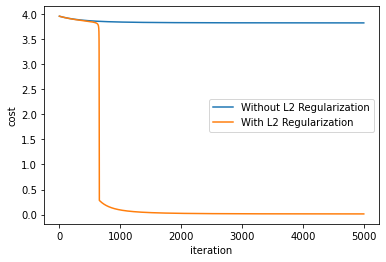

In [18]:
plt.plot(cost_path)
plt.plot(cost_path_L2)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.legend(['Without L2 Regularization', 'With L2 Regularization'])
plt.show()